In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch import nn, optim
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

from utils.model import NN

In [2]:
# load dataset
df = pd.read_csv("dataset/mnist_train.csv", header=None)

df.head() # look at first 5 data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# split data into X and y
X = df.drop(0, axis=1).to_numpy()
y = df[0].to_numpy()

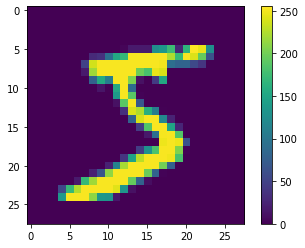

In [4]:
def show_image(x):

    # create subplot
    fig, _ = plt.subplots(1, 1)

    # plot image and colorbar
    img = plt.imshow( x.reshape(28, 28) )
    fig.colorbar(img)

    plt.show()

show_image(X[0])

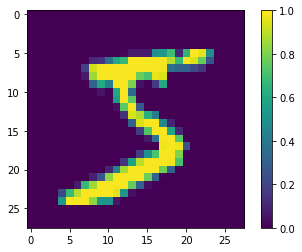

In [5]:
# normalization
X = X / 255

show_image(X[0])

In [6]:
# split data into train and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [7]:
# convert each data into tensor
X_train, y_train = torch.tensor(X_train), torch.tensor(y_train)
X_valid, y_valid = torch.tensor(X_valid), torch.tensor(y_valid)

# load each data with dataloader
train_dataloader = DataLoader(TensorDataset(X_train, y_train), batch_size=6000)
valid_dataloader = DataLoader(TensorDataset(X_valid, y_valid), batch_size=6000)

In [8]:
model = NN() # initate model

# set optimizer and loss function
optimizer       = optim.Adam(model.parameters(), lr=0.01)
loss_function   = nn.CrossEntropyLoss()

# set what device will be used and how many epochs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epochs = 200

In [9]:
best_valid_loss = float("inf") # set best valid loss to infinite

for epoch in range(epochs):

    print("\n=========================================")
    print("\nEpoch {:} / {:}\n".format(epoch+1, epochs))

    model.train()
    train_loss = 0

    for step, batch in enumerate(train_dataloader):
        
        # progress update after every 2 batches
        if step % 2 == 0 and not step == 0:
            print("  Batch {:>5,}  of  {:>5,}.".format(
                step, len(train_dataloader)
            ))

        # clear existing gradient
        model.zero_grad()
        
        # push data to device
        data, label = [b.to(device) for b in batch]

        # get predictions
        preds = model(data.float())
        
        # calculate train loss
        loss = loss_function(preds, label)

        # append loss
        train_loss += loss.item()
        
        # backpropagation
        loss.backward()

        # avoiding exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameter
        optimizer.step()
        optimizer.zero_grad()

        preds = preds.detach().cpu().numpy()

    train_loss /= len(train_dataloader)

    print("\nEvaluating...\n")
    
    valid_loss = 0

    for step, batch in enumerate(valid_dataloader):
        
        # progress update every 2 batches.
        if step % 2 == 0 and not step == 0:
            print("  Batch {:>5,}  of  {:>5,}.".format(
                step, len(valid_dataloader)
            ))
        
        # push data to device
        data, label = [b.to(device) for b in batch]
        
        with torch.no_grad():

            # get predictions
            preds = model(data.float())

            # calculate valid loss
            loss = loss_function(preds, label)
            
            # append loss
            valid_loss += loss.item()

            preds = preds.detach().cpu().numpy()

    valid_loss /= len(valid_dataloader)
    
    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), "model.pt")
    
    print()
    print(f"Train Loss: {train_loss:.3f}")
    print(f"Valid Loss: {valid_loss:.3f}")

200

  Batch     2  of      7.
  Batch     4  of      7.
  Batch     6  of      7.

Evaluating...

  Batch     2  of      3.

Train Loss: 1.649
Valid Loss: 1.669


Epoch 110 / 200

  Batch     2  of      7.
  Batch     4  of      7.
  Batch     6  of      7.

Evaluating...

  Batch     2  of      3.

Train Loss: 1.649
Valid Loss: 1.669


Epoch 111 / 200

  Batch     2  of      7.
  Batch     4  of      7.
  Batch     6  of      7.

Evaluating...

  Batch     2  of      3.

Train Loss: 1.648
Valid Loss: 1.669


Epoch 112 / 200

  Batch     2  of      7.
  Batch     4  of      7.
  Batch     6  of      7.

Evaluating...

  Batch     2  of      3.

Train Loss: 1.648
Valid Loss: 1.668


Epoch 113 / 200

  Batch     2  of      7.
  Batch     4  of      7.
  Batch     6  of      7.

Evaluating...

  Batch     2  of      3.

Train Loss: 1.648
Valid Loss: 1.668


Epoch 114 / 200

  Batch     2  of      7.
  Batch     4  of      7.
  Batch     6  of      7.

Evaluating...

  Batch     2  of    